In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('600600')
df['MA10_rolling'] = pd.rolling_mean(df['close'],10)
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10) 
df.tail(12)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  


,date,open,close,high,low,volume,code,MA10_rolling,MA10_talib
629,2018-01-25,40.90,40.80,41.27,40.30,61714.0,600600,42.153,42.153
630,2018-01-26,40.89,41.08,41.97,40.66,96532.0,600600,42.039,42.039
631,2018-01-29,41.11,39.26,41.44,38.83,89923.0,600600,41.685,41.685
632,2018-01-30,38.95,38.94,39.37,38.60,50732.0,600600,41.156,41.156
633,2018-01-31,39.02,39.89,40.10,38.94,64464.0,600600,40.826,40.826
634,2018-02-01,39.55,38.30,39.85,37.50,70534.0,600600,40.348,40.348
635,2018-02-02,38.28,40.16,40.47,37.65,61043.0,600600,40.199,40.199
636,2018-02-05,39.15,39.63,39.75,38.30,87597.0,600600,40.013,40.013
637,2018-02-06,38.52,38.02,38.88,37.00,77640.0,600600,39.715,39.715
638,2018-02-07,38.66,37.41,38.80,37.33,57814.0,600600,39.349,39.349


在Ta-lib的library中，计算平均移动均线的指标叫做SMA (simple moving average)
Ta-lib的语法总结起来，就是array in, array out
function中的第一个参数close是一个数组序列，可以想象成是一个股票很长一段时间以来的收市价的曲线。计算结果avg也是一个数组序列，因为她也是一条曲线，假设我们的close数组中共有最近100天的收市价，我们现在要计算这只股票30天的移动平均线。avg这条移动平均线上共有71个点，因为从第30天开始才能计算30天均值。我们能获得的，是包括今天在内的总共71天的30天平均值

如果我们要获得最近一天(今天）的移动平均值，就是获取avg这条曲线上的最后一个点，相当于数列中的最后一个值。昨天的平均值就是数列中的倒数第二个点，以此类推。


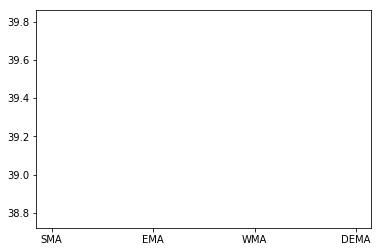

In [6]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('600600', '2017-11-01', '2018-03-01')
close = [float(x) for x in df['close']]
avg = talib.SMA(np.array(close), timeperiod=30)
today_mavg = avg[-1]
ystd_mavg = avg[-2]

#MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)

SMA = talib.MA(np.array(close),30,matype=0)[-1]
EMA = talib.MA(np.array(close),30,matype=1)[-1]
WMA = talib.MA(np.array(close),30,matype=2)[-1]
DEMA = talib.MA(np.array(close),30,matype=3)[-1]
TEMA = talib.MA(np.array(close),30,matype=4)[-1]

plt.plot('SMA',SMA)
plt.plot('EMA',EMA)
plt.plot('WMA',WMA)
plt.plot('DEMA',DEMA)
plt.plot('TEMA',TEMA) 

均线有很多不同的计算方法，比如EMA(指数移动平均值）和WMA(加权移动平均值）他们在计算均值时相对均会把更多的权重放在较近的日期，因此会比普通均线更灵敏，更能捕捉到市场的变化。那么我们如何选择到底要使用哪种均线呢？

Ta-lib考虑到这点，专门设计了matype这个变量，用数字代表均线计算方式，可以涵盖多种均线的计算方法。我们画出来看看。